# ElectroMKM class import and object instantiation

In [3]:
import sys
sys.path.insert(0, "../") 
from electromkm import electroMKM

The demo system deal with the Hydrogen Evolution Reaction (HER) with random values.

In [4]:
model = electroMKM('CO2R_Li',
                   'rm.mkm', 
                   'g.mkm', 
                    t_ref=298)

['C2C 3: C1O2(g) + 2H2O(e) + Li+(cat) -> C1O1(g) + H2O(g)', 'C2CA 5: C1O2(g) + 2H(e) + Li+(cat) -> C1O1(g) + H2O(g)', 'HER 8: 2H(e) -> H2(g)', 'H2OR 6: 2H2O(e) + Li+(cat) -> H2(g)', '', '', '', 'C1O2(g) + i000000  -> i102101a', 'C1O1(g) + i000000 -> i101101', 'i112102 + H2O(e) -> i101101 + H2O(g)', 'i102101a + H2O(e) -> i112102', 'i112102 + H(e) -> i101101 + H2O(g)', 'i102101a + H(e)   -> i112102', 'H2O(e) + i000000  -> i010101', 'H2(g) + 2i000000 -> 2i010101', 'H(e) + i000000 -> i010101']
Li+
Li+
Li+


# Model exploration


To investigate the characteristics of the system under study, several attributes can be easily inspected to check general information like number of elementary reactions, energetics, reaction network, etc.

In [5]:
print(model.species_gas)

['C1O2(g)', 'C1O1(g)', 'H2O(g)', 'H2(g)']


### Defined species in the system

N.B. H(e) is used to define H+ + e-.

In [6]:
model.species_tot

['i000000',
 'i010101',
 'i101101',
 'i102101a',
 'i112102',
 'H(e)',
 'H2O(e)',
 'C1O2(g)',
 'C1O1(g)',
 'H2O(g)',
 'H2(g)']

### Visualize Gibbs energetics of the system

Reaction types: 'ads'=adsorption
                'des'=desorption
                'sur'=surface reaction. 
The suffix "+e" means that that elementary reaction is a charge-transfer step.

In [7]:
model.df_gibbs

,,DGR / eV,DG barrier / eV,DG reverse barrier / eV
R1,ads,0.470,0.470,0.000
R2,ads,0.462,0.462,0.000
R3,des+b_e,0.203,0.848,0.645
R4,sur+b_e,0.080,0.744,0.664
R5,des+a_e,0.203,0.631,0.428
R6,sur+a_e,0.080,0.809,0.729
R7,sur+b_e,0.310,1.425,1.115
R8,ads,0.620,0.620,0.000
R9,sur+a_e,0.310,1.279,0.969


In [8]:
model.dh_barrier

array([0.   , 0.   , 0.832, 0.716, 0.589, 0.789, 1.428, 0.284, 1.282])

### Stoichiometric matrix of the reaction network

In [9]:
model.df_system

,R1,R2,R3,R4,R5,R6,R7,R8,R9
,ads,ads,des+b_e,sur+b_e,des+a_e,sur+a_e,sur+b_e,ads,sur+a_e
species,,,,,,,,,
i000000,-1,-1,0,0,0,0,-1,-2,-1
i010101,0,0,0,0,0,0,1,2,1
i101101,0,1,1,0,1,0,0,0,0
i102101a,1,0,0,-1,0,-1,0,0,0
i112102,0,0,-1,1,-1,1,0,0,0
H(e),0,0,0,0,-1,-1,0,0,-1
H2O(e),0,0,-1,-1,0,0,-1,0,0
C1O2(g),-1,0,0,0,0,0,0,0,0


### Stoichiometric vector of the global reactions

In [10]:
model.gr_string

['C1O2(g) + 2H2O(e) + Li+(cat) -> C1O1(g) + H2O(g)',
 'C1O2(g) + 2H(e) + Li+(cat) -> C1O1(g) + H2O(g)',
 '2H(e) -> H2(g)',
 '2H2O(e) + Li+(cat) -> H2(g)']

In [11]:
model.target_label

'C2C'

model.stoich_numbers tells us that the first elementary reaction must be multiplied by two and summed up to the second one in order to get the global reaction. This is useful for checking the thermodynamic consistency of the developed models.

# Microkinetic runs and Tafel plot

Up to now, it is possible to run steady state runs via the electroMKM.kinetic_run() function.
The main inputs that must be provided are the applied overpotential and the pH of the electrolyte solution.
The output of the function is a Python dictionary containing information related to the performed simulation.

In [17]:
model.set_ODE_params(t_final=1000,reltol=1e-6,abstol=1e-16)

Final integration time = 1000s
Relative tolerance = 1e-06
Absolute tolerance = 1e-16


'Changed ODE solver parameters.'

### Steady state simulation

In [18]:
help(electroMKM.kinetic_run)

Help on function kinetic_run in module electromkm:

kinetic_run(self, overpotential:float, pH:float, cation_conc:float, potential_dl:float, initial_sur_coverage:list=None, temperature:float=298.0, pressure:float=100000.0, gas_composition:numpy.ndarray=None, verbose:int=0, jac:bool=False)
    Simulates a steady-state electrocatalytic run at the defined operating conditions.        
    Args:
        overpotential(float): applied overpotential [V vs SHE].
        pH(float): pH of the electrolyte solution [-].
        cation_conc(float): cation_conc at OHP [M]
        potential_dl (float): potential difference across double layer [V]
        temperature(float): Temperature of the system [K].
        pressure(float): Absolute pressure of the system [Pa].
        initial_conditions(nparray): Initial surface coverage array[-].
        verbose(int): 0=print all output; 1=print nothing.        
    Returns:
        (dict): Report of the electrocatalytic simulation.



In [19]:
import numpy as np
array=[]
for i in model.species_gas:
    if i=='C1O2(g)':
        array.append(0.016)
    elif i=='H2O(g)':
        array.append(1)
    else:
        array.append(0)
array=np.array(array)
print(array)
exp = model.kinetic_run(-1.80, 5.36, 3.665,0.99, gas_composition = array , jac = True)

[0.016 0.    1.    0.   ]
CO2R_Li: Microkinetic run
Overpotential = -1.8V vs SHE    pH = 5.36
Overpotential = -1.48376V vs RHE
Temperature = 298.0K    Pressure = 1.0bar
cation_ads_ener: 0.32, site_adj_factor: 0.000
cation_ads_ener: 0.32, site_adj_factor: 0.000
cation_ads_ener: 0.32, site_adj_factor: 0.000
final adjust_factor is : [1.313293926015825e-05, 1.313293926015825e-05, 1, 1.313293926015825e-05]

C2C Current density: -2.35e-03 mA cm-2
C2C Selectivity: 6.37%
Most Abundant Surface Intermediate: i000000 Coverage: 100.00% 
CPU time: 0.06 s


In [21]:
import numpy as np
array=[]
for i in model.species_gas:
    if i=='C1O2(g)':
        array.append(0.082)
    elif i=='H2O(g)':
        array.append(1)
    else:
        array.append(0)
array=np.array(array)
print(array)
exp = model.kinetic_run(-1.50, 5.337, 3.43,0.74, gas_composition = array , jac = True)

[0.082 0.    1.    0.   ]
CO2R_Li: Microkinetic run
Overpotential = -1.5V vs SHE    pH = 5.337
Overpotential = -1.185117V vs RHE
Temperature = 298.0K    Pressure = 1.0bar
cation_ads_ener: 0.37, site_adj_factor: 0.000
cation_ads_ener: 0.37, site_adj_factor: 0.000
cation_ads_ener: 0.37, site_adj_factor: 0.000
final adjust_factor is : [1.7538015281782819e-06, 1.7538015281782819e-06, 1, 1.7538015281782819e-06]

C2C Current density: -1.61e-03 mA cm-2
C2C Selectivity: 99.17%
Most Abundant Surface Intermediate: i000000 Coverage: 100.00% 
CPU time: 0.11 s


In [14]:
print(exp['j_HER']/20,exp['j_H2OR']/20)

print(exp['j_C2CA']/10,exp['j_C2C']/10)

-2.082668765496016 -0.007924831330637257
-8.159355057042006e-07 -0.004386050036951506


In [43]:
model.df_gibbs_e

,,DGR_e / eV,DG barrier_e / eV,DG reverse barrier_e / eV
R1,ads,0.454000,0.454000,0.000000
R2,ads,0.398000,0.398000,0.000000
R3,des+b_e,-1.587424,0.000000,1.587424
R4,sur+b_e,-1.164424,0.000000,1.164424
R5,des+a_e,-1.587424,0.006576,1.594000
R6,sur+a_e,-1.164424,0.220576,1.385000
R7,sur+b_e,-1.215424,0.545000,1.760424
R8,ads,0.556000,0.556000,0.000000
R9,sur+a_e,-1.215424,0.690576,1.906000


In [28]:
exp['j_HER']/20


-136.95593675088952

In [29]:
exp['ddt']

{'i000000': 1.1368683772161603e-13,
 'i010101': -1.1368683772161603e-13,
 'i101101': -1.1368683772161603e-13,
 'i102101a': 0.0,
 'i112102': 5.684341886080802e-14,
 'H(e)': 0.0,
 'H2O(e)': 0.0,
 'C1O2(g)': 0.0,
 'C1O1(g)': 0.0,
 'H2O(g)': 0.0,
 'H2(g)': 0.0}

Once steady state conditions have been checked, the solution can be easily analyzed. the main output consists of steady state surface coverage and reaction rate in term of current density.

In [30]:
exp['theta']

{'i000000': 0.9999916672577316,
 'i010101': 8.332526657750082e-06,
 'i101101': 6.743421550802564e-11,
 'i102101a': 1.1491311209814484e-10,
 'i112102': 3.3717107754012815e-11}

In [31]:
exp['r']

{'R1': 418.7137727511946,
 'R2': -418.71377275119465,
 'R3': 209.35688637559727,
 'R4': 413.653480102978,
 'R5': 209.35688637559727,
 'R6': 5.060292648216587,
 'R7': 7.41277157717001,
 'R8': -431.11224690781825,
 'R9': 854.8117222384664}

Negative current density means reduction is occurring, while positive values means that reaction is evolving in the opposite direction. Values of current density are stored in mA cm-2.

In [32]:
exp['j_C2C']

-7.256220707403094

### Tafel plot

In [61]:
import numpy as np
n = np.arange(-1.1,-2.2,-0.2)
#n = np.array([-1.5,-1.75,-2,-2.25])
print(n)

[-1.1 -1.3 -1.5 -1.7 -1.9 -2.1]


In [19]:
help(electroMKM.tafel_plot)

Help on function tafel_plot in module electromkm:

tafel_plot(self, reaction_label:str, overpotential_vector:numpy.ndarray, pH:float, cation_conc:float, initial_sur_coverage:list=None, temperature:float=298.0, pressure:float=100000.0, gas_composition:numpy.ndarray=None, verbose:int=0, jac:bool=True)
    Returns the Tafel plot for the defined potential range.
    Args:
        reaction_label(str): Label of the reaction of interest.
        overpotential_vector(ndarray): applied overpotential vector [V].
        pH(float): pH of the electrolyte solution [-].
        initial_conditions(ndarray): initial surface coverage and gas composition [-]
        temperature(float): Temperature of the system [K].
        pressure(float): Absolute pressure of the system [Pa].
        verbose(bool): 0=; 1=.
        jac(bool): Inclusion of the analytical Jacobian for ODE numerical solution.



CO2R_K: Tafel slope experiment for C2C
Temperature: 298.0 K    Pressure: 1 bar    pH: 7

Overpotential = -1.11 V    C2C Current Density = 7.38e-07 mA cm-2
Overpotential = -1.31 V    C2C Current Density = 7.89e-05 mA cm-2
Overpotential = -1.51 V    C2C Current Density = 8.29e-03 mA cm-2
Overpotential = -1.71 V    C2C Current Density = 4.61e-01 mA cm-2
Overpotential = -1.91 V    C2C Current Density = 1.02e+00 mA cm-2
Overpotential = -2.11 V    C2C Current Density = 2.23e+00 mA cm-2
Overpotential = -2.3099999999999996 V    C2C Current Density = 4.86e+00 mA cm-2
Overpotential = -2.51 V    C2C Current Density = 1.06e+01 mA cm-2
Overpotential = -2.71 V    C2C Current Density = 2.30e+01 mA cm-2
------------------------------------------------------------------
Tafel slope = -194.88 mV    alfa = 0.99
CPU time: 1.38 s


/home/rseemakurthi/miniconda3/envs/jupyter/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


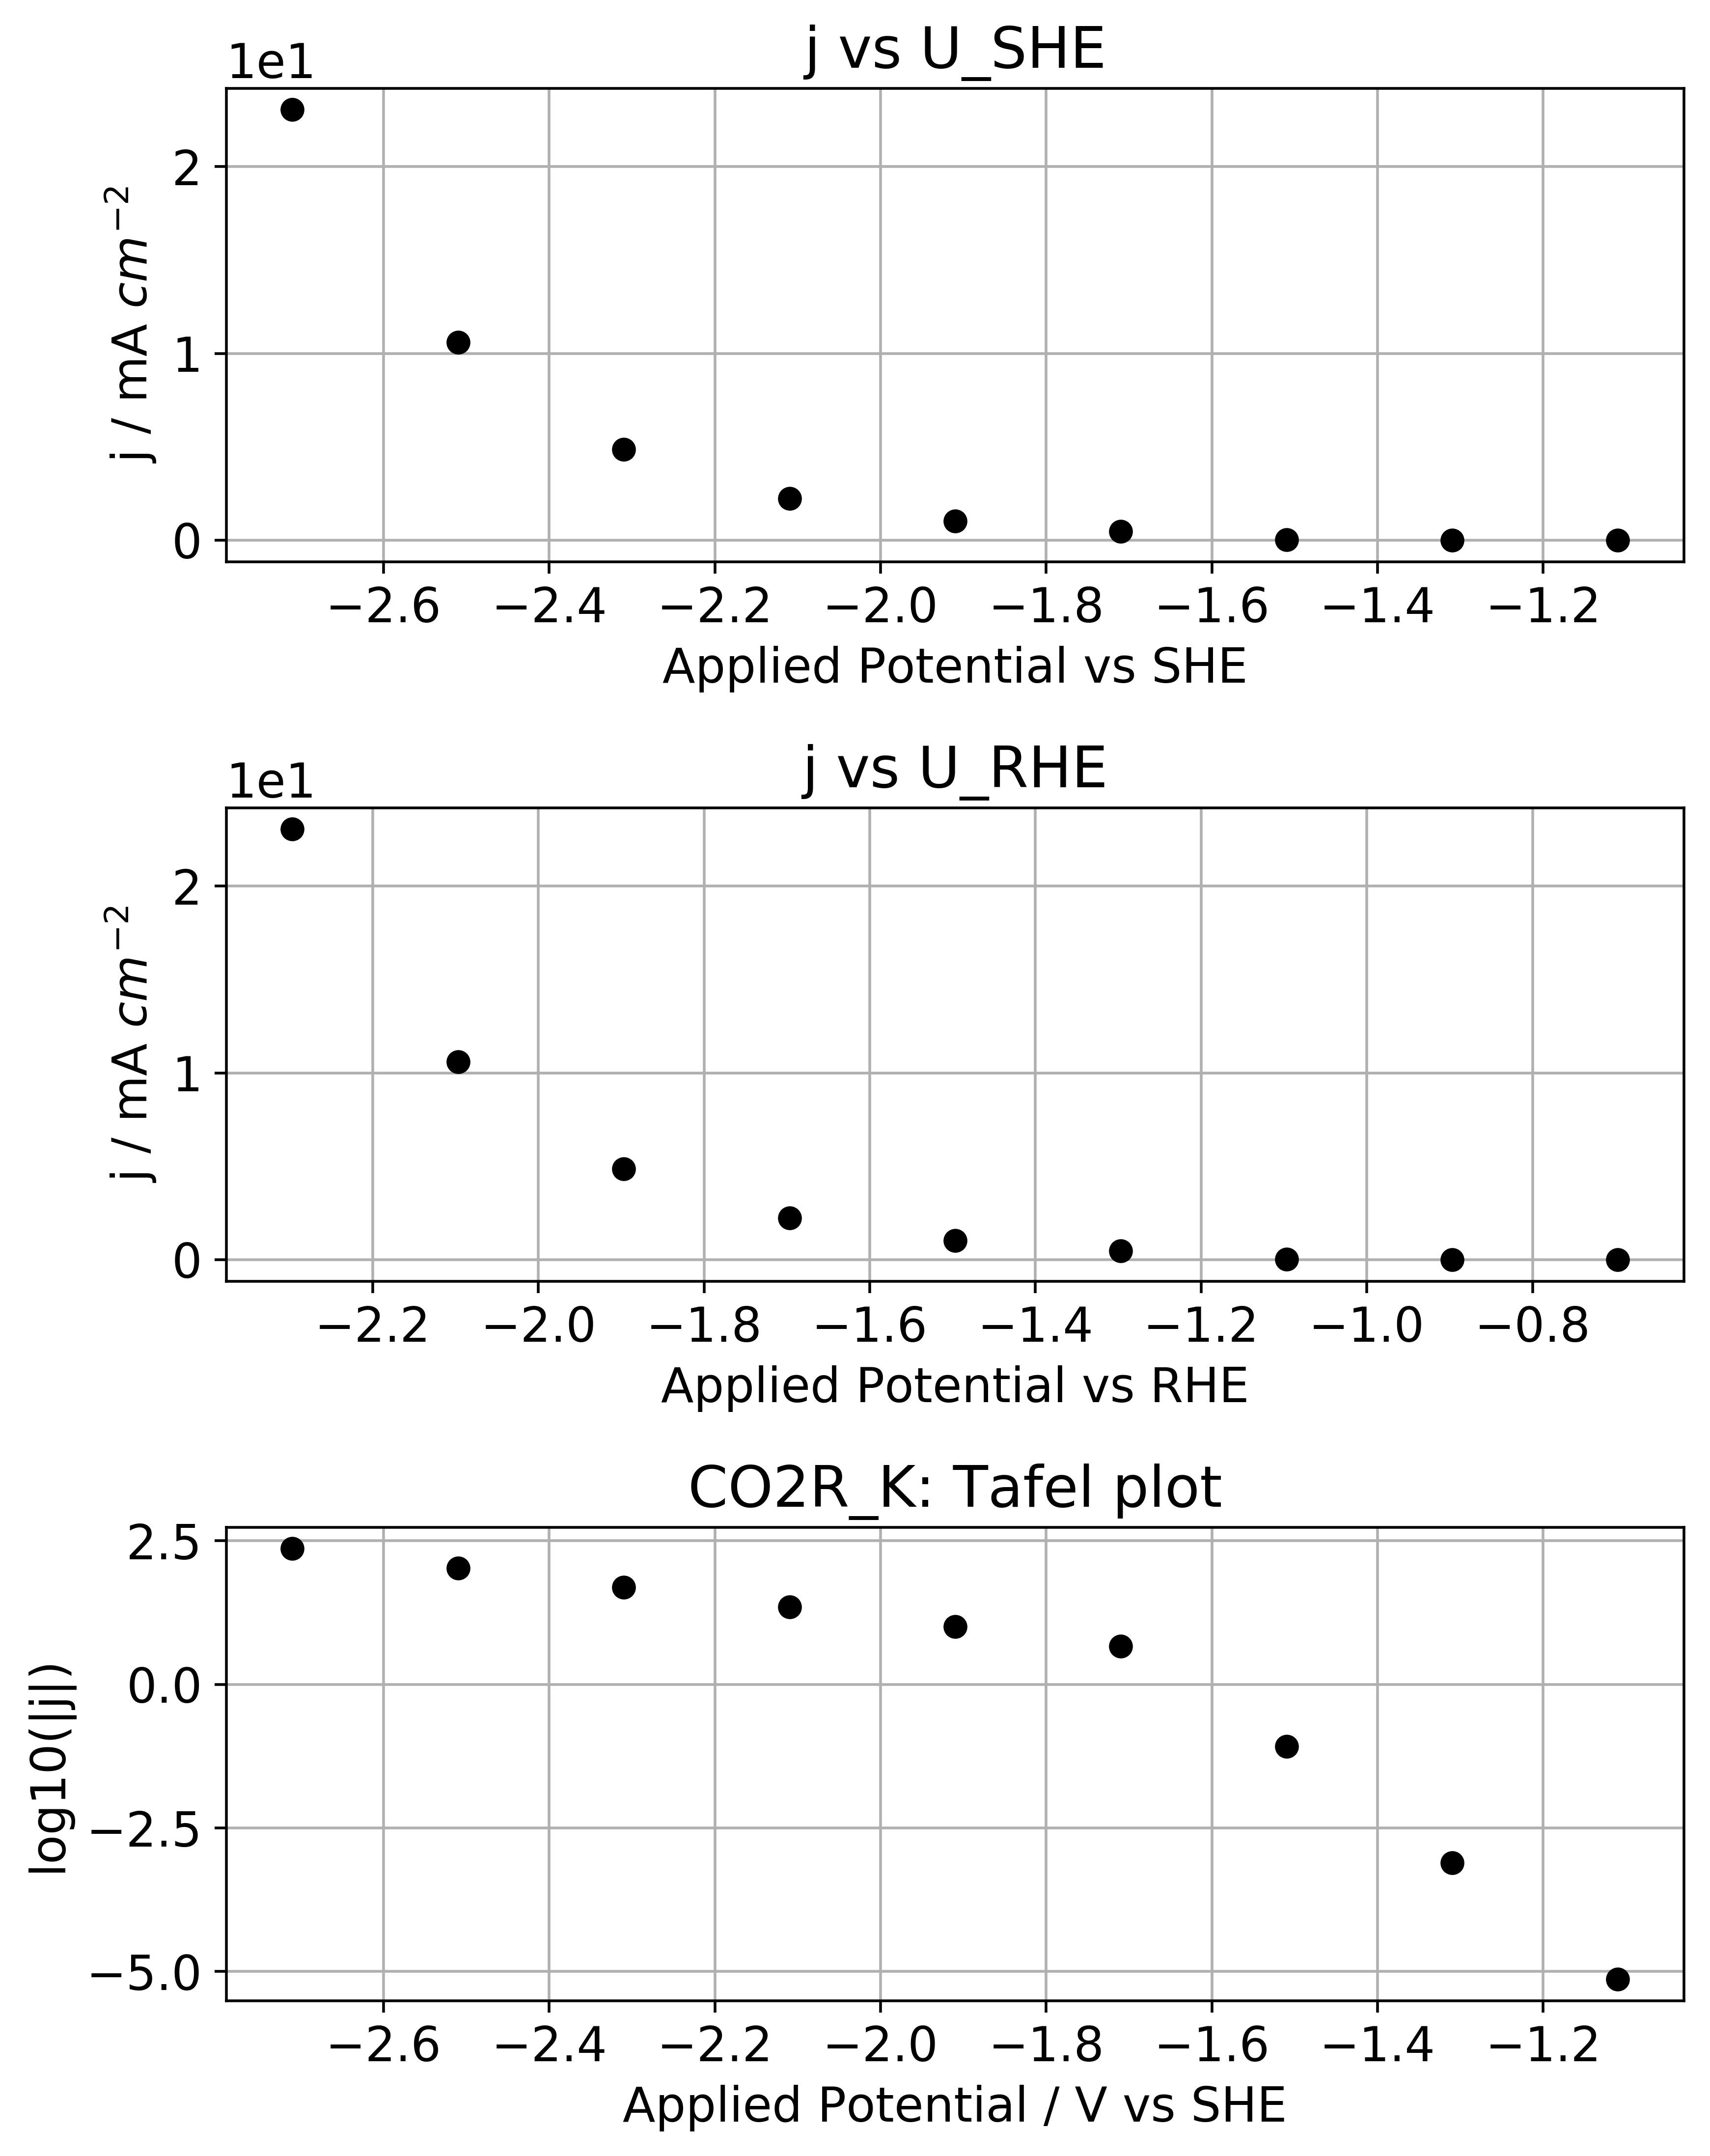

-0.19488327432997965

In [20]:
model.tafel_plot("C2C", n ,7, 1, gas_composition = array, jac=True)

In [69]:
pH_array=[4,5,6,7,8,9]
ratio_CO2R=[]
ratio_HER=[]

for pH in pH_array:
    exp = model.kinetic_run(-1.7, pH, 3.7, gas_composition = array , jac = True)
    ratio_CO2R.append(exp['r']['R6']/exp['r']['R4'])
    ratio_HER.append(exp['r']['R9']/exp['r']['R7'])

CO2R_K: Microkinetic run
Overpotential = -1.7V vs SHE    pH = 4
Overpotential = -1.464V vs RHE
Temperature = 298.0K    Pressure = 1.0bar
cation_ads_ener: 3.08, site_adj_factor: 0.000

C2C Current density: -1.18e-02 mA cm-2
C2C Selectivity: 0.19%
Most Abundant Surface Intermediate: i000000 Coverage: 100.00% 
CPU time: 0.17 s
CO2R_K: Microkinetic run
Overpotential = -1.7V vs SHE    pH = 5
Overpotential = -1.405V vs RHE
Temperature = 298.0K    Pressure = 1.0bar
cation_ads_ener: 3.08, site_adj_factor: 0.000

C2C Current density: -1.18e-02 mA cm-2
C2C Selectivity: 1.84%
Most Abundant Surface Intermediate: i000000 Coverage: 100.00% 
CPU time: 0.15 s
CO2R_K: Microkinetic run
Overpotential = -1.7V vs SHE    pH = 6
Overpotential = -1.346V vs RHE
Temperature = 298.0K    Pressure = 1.0bar
cation_ads_ener: 3.08, site_adj_factor: 0.000

C2C Current density: -1.18e-02 mA cm-2
C2C Selectivity: 15.48%
Most Abundant Surface Intermediate: i000000 Coverage: 100.00% 
CPU time: 0.14 s
CO2R_K: Microkinetic 

In [70]:
ratio_HER

[4185.628539114072,
 419.64627758474626,
 42.07325056322521,
 4.2182154531287575,
 0.422913403904353,
 0.04240080887032562]

In [63]:
rxn_list = ['C2C','HER']
label = ['CO','H2']#,'Methane']

color = ['r','g']

model.j_potential(rxn_list, label, n ,7,3.7, color, gas_composition = array, jac=True,set_y_lim=[-10,25])

CO2R_K: Tafel slope experiment for ['C2C', 'HER']
Temperature: 298.0 K    Pressure: 1 bar    pH: 7



TypeError: kinetic_run() missing 1 required positional argument: 'cation_conc'

In [16]:
model.drc_full('C2C',-2.5, 7,1, gas_composition = array,jac='True')

CO2R_K: Full DRC and DSC analysis wrt C2C global reaction
Temperature = 298.0K    Pressure = 1.0bar
Gas composition: C1O2=100.0%  C1O1=0.0%  H2O=100.0%  H2=0.0%  

R1
DRC = 0.50

R2
DRC = 0.00

R3
DRC = -0.00

R4
DRC = -0.00

R5
DRC = -0.00

R6
DRC = 0.00

i000000
DRC = -1.00

i010101
DRC = -0.00

i101101
DRC = -0.00

i102101a


KeyboardInterrupt: 

### Check for the analytical Jacobian matrix

In order to check if the implemented analytical Jacobian is correct or not, we run the same simulation with and without the analytical Jacobian: If the solutions are the same, the Jacobian is correct. If not, it means that the wrong Jacobian drives the system away from the correct solution. 

#### Simulation without analytical Jacobian

In [ ]:
exp1 = model.kinetic_run(-0.1, 7, jac=False)

#### Simulation with analytical Jacobian

In [ ]:
exp2 = model.kinetic_run(-0.1, 7, jac=True)

Observe the difference in the CPU time required to integrate the system without and with the Jacobian!